In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_wav_energy = pd.read_csv("data_feature_wav_energy8_12k_1024_load_1.csv")

In [3]:
data_wav_energy['fault'] = pd.Categorical(data_wav_energy['fault'])

In [4]:
train_wav_energy, test_wav_energy = train_test_split(data_wav_energy, test_size=400, stratify=data_wav_energy['fault'], random_state=324)

In [5]:
scaler = StandardScaler()
train_wav_energy_scaled = scaler.fit_transform(train_wav_energy.iloc[:, :-1])
test_wav_energy_scaled = (test_wav_energy.iloc[:, :-1].values - scaler.mean_) / np.sqrt(scaler.var_)

In [6]:
knn_clf = KNeighborsClassifier()

In [7]:
knn_clf.fit(train_wav_energy_scaled, train_wav_energy['fault'])


KNeighborsClassifier()

In [8]:
train_predictions = knn_clf.predict(train_wav_energy_scaled)
test_predictions = knn_clf.predict(test_wav_energy_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [9]:
train_confu_matrix = confusion_matrix(train_wav_energy['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_wav_energy['fault'], test_predictions)

In [10]:
train_accuracy = accuracy_score(train_wav_energy['fault'], train_predictions)
print("Overall training accuracy: ", train_accuracy)

Overall training accuracy:  0.996938775510204


In [11]:
test_accuracy = accuracy_score(test_wav_energy['fault'], test_predictions)
print("Overall test accuracy: ", test_accuracy)

Overall test accuracy:  0.9975


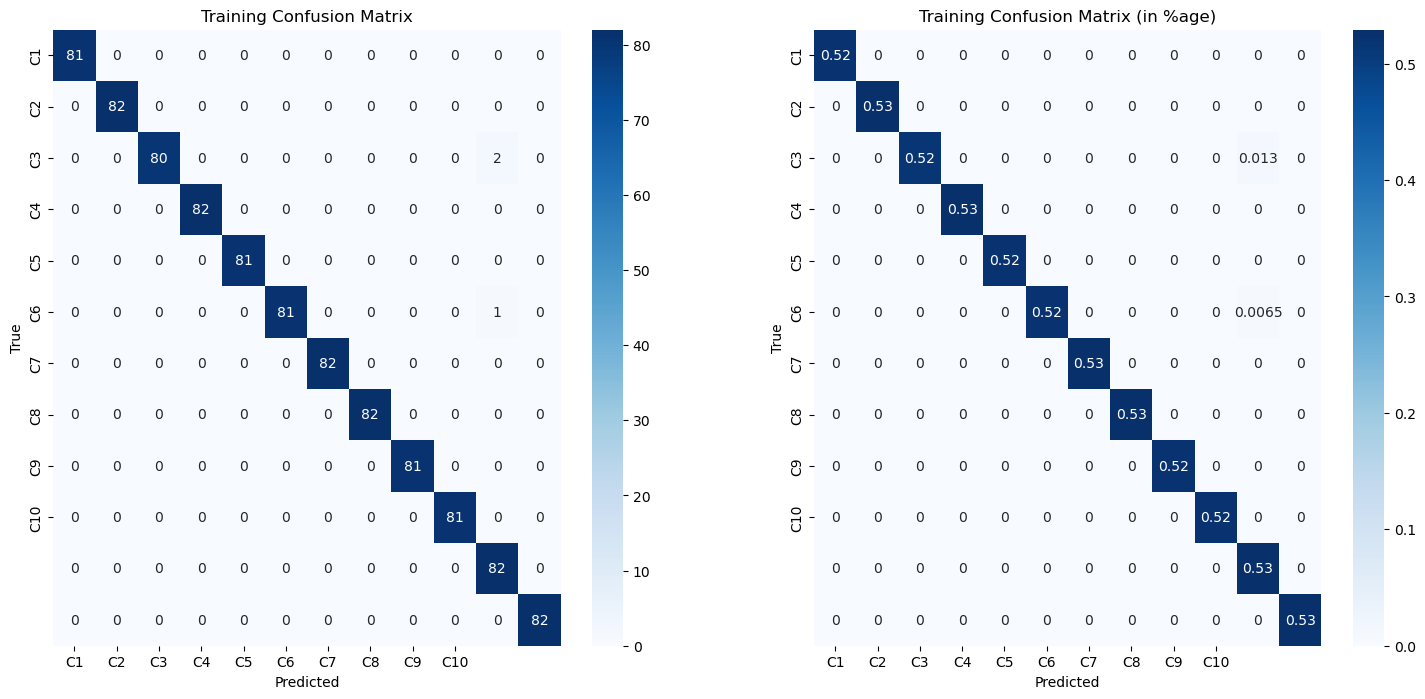

In [12]:
fault_type = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']
plt.figure(1, figsize=(18, 8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot=True, fmt="d",
            xticklabels=fault_type, yticklabels=fault_type, cmap="Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_confu_matrix / 155, annot=True,
            xticklabels=fault_type, yticklabels=fault_type, cmap="Blues")
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

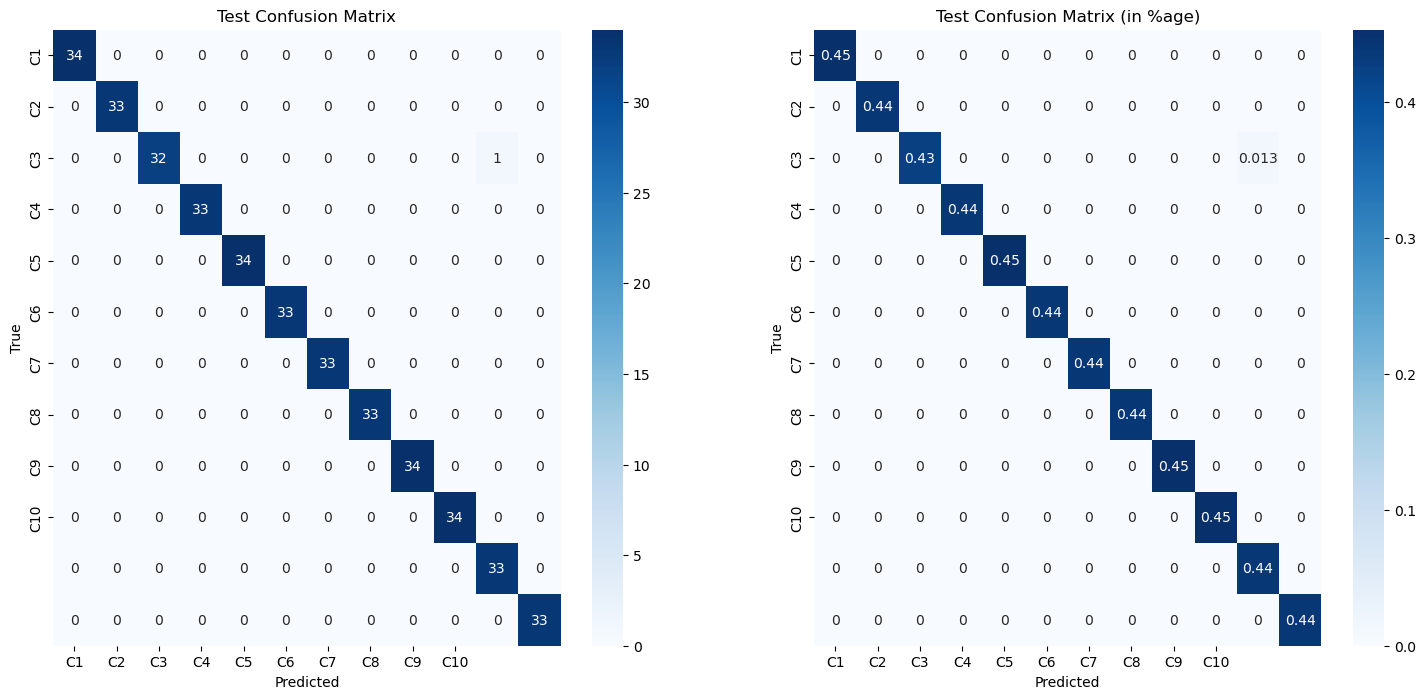

In [13]:
plt.figure(2, figsize=(18, 8))
plt.subplot(121)
sns.heatmap(test_confu_matrix, annot=True,
            xticklabels=fault_type, yticklabels=fault_type, cmap="Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix / 75, annot=True,
            xticklabels=fault_type, yticklabels=fault_type, cmap="Blues")
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
train_precision = precision_score(train_wav_energy['fault'], train_predictions, average='macro')
train_recall = recall_score(train_wav_energy['fault'], train_predictions, average='macro')
train_specificity = np.mean(train_confu_matrix.diagonal() / train_confu_matrix.sum(axis=1))
train_f1_score = f1_score(train_wav_energy['fault'], train_predictions, average='macro')
train_log_loss = log_loss(train_wav_energy['fault'], knn_clf.predict_proba(train_wav_energy_scaled))

test_precision = precision_score(test_wav_energy['fault'], test_predictions, average='macro')
test_recall = recall_score(test_wav_energy['fault'], test_predictions, average='macro')
test_specificity = np.mean(test_confu_matrix.diagonal() / test_confu_matrix.sum(axis=1))
test_f1_score = f1_score(test_wav_energy['fault'], test_predictions, average='macro')
test_log_loss = log_loss(test_wav_energy['fault'], knn_clf.predict_proba(test_wav_energy_scaled))

In [15]:
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training Specificity:", train_specificity)
print("Training F1 Score:", train_f1_score)
print("Training Log Loss:", train_log_loss)

Training Precision: 0.9970588235294118
Training Recall: 0.9969512195121951
Training Specificity: 0.9969512195121951
Training F1 Score: 0.9969629399838511
Training Log Loss: 0.0037157616335616625


In [16]:
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test Specificity:", test_specificity)
print("Test F1 Score:", test_f1_score)
print("Test Log Loss:", test_log_loss)

Test Precision: 0.9975490196078431
Test Recall: 0.9974747474747474
Test Specificity: 0.9974747474747474
Test F1 Score: 0.9974741676234213
Test Log Loss: 0.0059605727050977345
